# 8.5 洛杉矶人口调查数据的因子分析

<h1>目录<span class="tocSkip"></span></h1>
<ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#引言" data-toc-modified-id="引言-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>引言</a></span></li><li><span><a href="#一、数据探索性分析" data-toc-modified-id="一、数据探索性分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>一、数据探索性分析</a></span></li><li><span><a href="#二、正交因子模型建立" data-toc-modified-id="二、正交因子模型建立-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>二、正交因子模型建立</a></span></li><li><span><a href="#三、使用主成分法求解模型" data-toc-modified-id="三、使用主成分法求解模型-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>三、使用主成分法求解模型</a></span></li><li><span><a href="#四、使用主因子法求解模型" data-toc-modified-id="四、使用主因子法求解模型-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>四、使用主因子法求解模型</a></span></li><li><span><a href="#五、使用极大似然法求解模型" data-toc-modified-id="五、使用极大似然法求解模型-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>五、使用极大似然法求解模型</a></span></li></ul></li></ul></li></ul></div>

### 引言

因子分析也是一种重要的降维方法，与主成分分析法相比，它的可解释性更强，通常能够通过因子旋转对提取的因子给出较为符合实际背景和意义的解释。因子分析的主要目的是用几个潜在的、不可观测的随机变量（即因子）来描述原始变量间的协方差关系或相关关系。需要注意的是，因子往往不能表示为原始变量的线性组合，并且往往会随着模型中因子个数的变化而不同。

本案例的数据是对洛杉矶12个标准大都市居民统计地区中进行人口调查获得的，它有五个社会经济变量，分别是人口总数、教育水平、佣人总数、服务业人数、房价水平。下面我们通过这个案例对因子分析方法的操作进行展示。

### 一、数据探索性分析

In [28]:
# 读入数据
data = read.table('.//AMSA_data//《应用多元统计分析》（第6版）文本数据（以逗号为间隔）//exec8.5.csv',header = TRUE,sep = ',',row.names = '编号')
head(data)
colnames(data) = c('人口','教育','佣人','服务业','房价')

,人口总数,居民的教育程度或教育年数的中位数,佣人总数,各种服务行业的人数,房价中位数
,<int>,<dbl>,<int>,<int>,<int>
1,5700,12.8,2500,270,25000
2,1000,10.9,600,10,10000
3,3400,8.8,1000,10,9000
4,3800,13.6,1700,140,25000
5,4000,12.8,1600,140,25000
6,8200,8.3,2600,60,12000


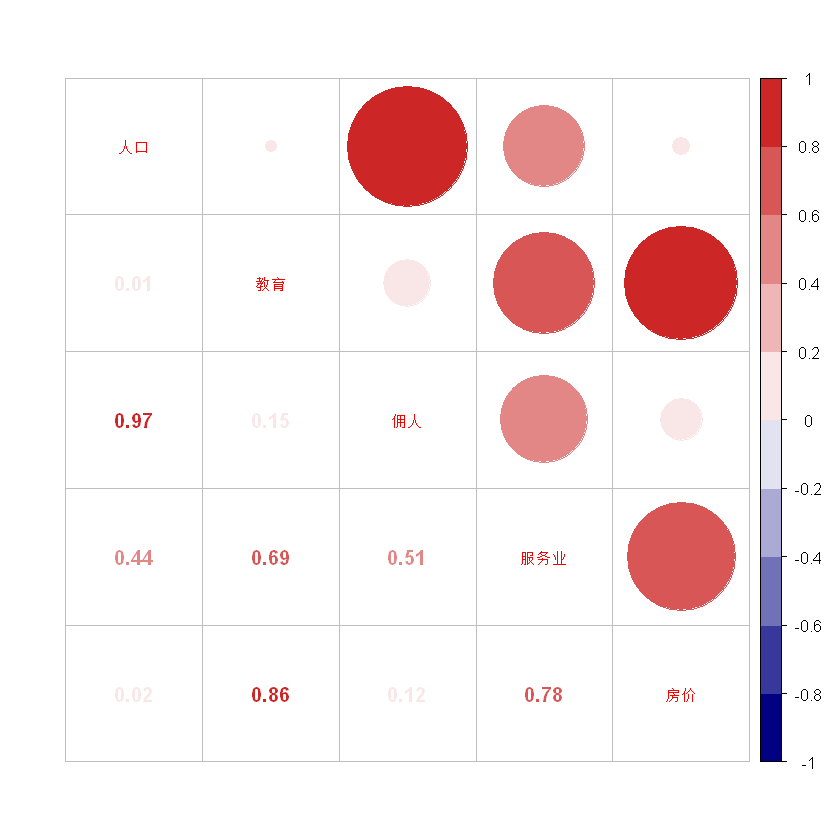

In [9]:
# 绘制热力图
library("corrplot")
b = cor(as.matrix(data)) # 相关系数矩阵
col = colorRampPalette(c("navy", "white", "firebrick3"))
corrplot(b,type = "upper",col = col(10),tl.pos = "d",tl.cex = 0.75) 
corrplot(b,add = TRUE, type = "lower", method = "number",diag = FALSE,tl.pos = "n", cl.pos = "n",col = col(10))

通过观察变量之间的相关系数可知，各变量之间存在交错复杂的相关关系，其中人口和佣人变量之间的相关系数最强，相关系数高达0.97；教育和房价的相关程度次之，相关系数为0.86；之后是服务业和房价。从图中我们还可以得到更多的信息，红色代表变量之间的正相关关系，气泡的越大、颜色越深，表明两变量间的相关程度越大。

### 二、正交因子模型建立

设有 $\mathrm{p}$ 维可观测的随机向量 $x=\left(x_{1}, x_{2}, \ldots, x_{p}\right)^{\prime}$, 其均值为 $\mu=\left(\mu_{1}, \mu_{2}, \ldots, \mu_{p}\right)^{\prime}$, 协方差矩阵为 $\Sigma=\left(\sigma_{i j}\right)$, 公共因子向量为 $f=$ $\left(f_{1}, f_{2}, \ldots, f_{m}\right)^{\prime}$, 特殊因子向量为 $\varepsilon=\left(\varepsilon_{1}, \varepsilon_{2}, \ldots, \varepsilon_{p}\right)^{\prime}$, 因子载荷矩阵为 $\mathrm{A}=\left(a_{i j}\right): \mathrm{p} \times \mathrm{m}$. 则**模型**用矩阵和向量表示为:

$$
x=\mu+A f+\varepsilon
$$

**假设条件**为：

$$
\left\{\begin{array}{l}
E(f)=0 \\
E(\varepsilon)=0 \\
V(f)=I \\
V(\varepsilon)=D=\operatorname{diag}\left(\sigma_{1}^{2}, \sigma_{2}^{2}, \ldots, \sigma_{p}^{2}\right) \\
\operatorname{Cov}(f, \varepsilon)=E\left(f \varepsilon^{\prime}\right)=0
\end{array}\right.
$$

进一步, 我们需要解释因子载荷矩阵 $\mathrm{A}$ 的**统计意义**:

(1) $\mathrm{A}$ 的元素: 若使用协方差矩阵 $\Sigma$ 进行分解, $a_{i j}$ 是 $x_{i}$ 与 $f_{j}$ 之间的协方差；如果使用相关矩阵 $\mathrm{R}$, 则表示 $x_{i}$ 与 $f_{j}$ 之间的相关系 数。

(2) A 的行平方和: 即共性方差(Communality)，反映了公共因子对 $x_{i}$ 的影响，可以看成是公共因子 $f_{1}, f_{2}, \ldots, f_{m}$ 对 $x_{i}$ 的方差贡 献。表达式为:

$$
h_{i}^{2}=\sum_{j=1}^{m} a_{i j}^{2}, \mathrm{i}=1,2, \ldots, \mathrm{p}
$$

另, 称 $\sigma_{i}^{2}$ 是特殊因子 $\varepsilon_{i}$ 对 $x_{i}$ 的方差贡献，称为特殊方差，且有 $\sigma_{i i}=h_{i}^{2}+\sigma_{i}^{2}$ 的关系式。

(3) A 的列平方和：公共因子 $f_{i}$ 对 $x_{1}, x_{2}, \ldots, x_{p}$ 的总方差贡献，是衡量公共因子 $f_{i}$ 重要性的尺度。

$$
g_{j}^{2}=\sum_{i=1}^{p} a_{i j}^{2}, \mathrm{j}=1,2, \ldots, \mathrm{m}
$$

$f_{i}$ 的贡献率为为 $g_{j}^{2} / \sum_{i=1}^{p} V\left(x_{i}\right)$.

(4) A 的所有元素的平方和：公共因子对总方差的累计贡献。 

在**模型求解**时, $\mu$ 和 $\Sigma$ 可分别估计为

$$
\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}
$$

和

$$
\mathrm{S}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(x_{i}-\bar{x}\right)^{\prime}
$$

为建立因子模型, 还需要估计因子载荷矩阵 $\mathrm{A}$ 和特殊方差矩阵 $\mathrm{D}$ 。常用的参数估计方法有如下三种: 主成分法、主因子法 和极大似然法。

### 三、使用主成分法求解模型

设样本协方差矩阵 $\mathrm{S}$ 的特征值依次为 $\hat{\lambda_{1}} \geq \hat{\lambda_{2}} \geq \cdots \geq \hat{\lambda_{p}} \geq 0$, 相应的正交单位特征向量为 $\hat{t}_{1}, \hat{t}_{2}, \ldots, \hat{t}_{p}$ 。选取相对较小的因子 数 $\mathrm{m}$, 并使得累计贡献率达到一个较高的百分比, 此时 $\hat{\lambda}_{m+1}, \ldots, \hat{\lambda}_{p}$ 一般已经相对较小, 于是 $\mathrm{S}$ 可作如下的近似分解:

$$
\mathrm{S}=\hat{A} \hat{A}^{\prime}+\hat{D}
$$

其中, $\hat{A}=\left(\sqrt{\hat{\lambda}_{1}} \hat{t}_{1}, \ldots, \sqrt{\hat{\lambda}_{m}} \hat{t}_{m}\right)=\left(\hat{a}_{i j}\right), \hat{D}=\operatorname{diag}\left(\hat{\sigma}_{1}^{2}, \hat{\sigma}_{2}^{2}, \ldots, \hat{\sigma}_{p}^{2}\right), \quad \hat{\sigma}_{i}^{2}=s_{i i}-\sum_{i=1}^{m} \hat{a}_{i j}^{2}, \mathrm{i}=1,2, \ldots, \mathrm{p}$ 。

称 $S-\left(\hat{A} \hat{A}^{\prime}+\hat{D}\right)$ 为残差矩阵, 有

$$
S-\left(\hat{A} \hat{A}^{\prime}+\hat{D}\right) \text { 的元素平方和 } \leq \hat{\lambda}^{2}{ }_{m+1}+\cdots+\hat{\lambda}^{2}{ }_{p}
$$

因而, 当被略去的特征值的平方和较小时，表示因子模型的拟合是较好的。

当 $p$ 个原始变量的单位不同, 或虽然单位相同, 但各变量的数值变异性相差较大时, 应该用样本相关矩阵代替上式中的 S。

下面，分别取m=1和m=2进行主成分法求解.

In [12]:
library(psych)
pc1 = principal(data, nfactors = 1, residuals = TRUE, rotate = "none", covar = FALSE)  #主成分法因子分析，从相关矩阵出发（即covar = FALSE，为缺省选项），选取2个因子，残差矩阵，未旋转
pc1$loadings  #因子载荷矩阵，列元素的平方和、因子所解释的总方差的比例及累计比例


Loadings:
       PC1  
人口   0.581
教育   0.767
佣人   0.672
服务业 0.932
房价   0.791

                 PC1
SS loadings    2.873
Proportion Var 0.575

In [13]:
pc = principal(data, nfactors = 2, residuals = TRUE, rotate = "none", covar = FALSE)  #主成分法因子分析，从相关矩阵出发（即covar = FALSE，为缺省选项），选取2个因子，残差矩阵，未旋转
pc$loadings  #因子载荷矩阵，列元素的平方和、因子所解释的总方差的比例及累计比例


Loadings:
       PC1    PC2   
人口    0.581  0.806
教育    0.767 -0.545
佣人    0.672  0.726
服务业  0.932 -0.104
房价    0.791 -0.558

                 PC1   PC2
SS loadings    2.873 1.797
Proportion Var 0.575 0.359
Cumulative Var 0.575 0.934

可以看到，当m=1时，因子所解释的总方差的比例仅仅为0.575，而当m=2时，累计解释比例已经达到了0.934。因此，我们选择m=2.


In [14]:
data.frame(round(pc$communality, 3))  #共性方差

,round.pc.communality..3.
,<dbl>
人口,0.988
教育,0.885
佣人,0.979
服务业,0.880
房价,0.938


共性方差反映了全部公共因子对原始变量的影响。我们发现两因子的共性方差都很大（均大于85%），表明两个因子能够解释各变量方差的绝大部分。

In [15]:
residual = pc$residual-diag(diag(pc$residual))  #残差矩阵（pc$residual的对角线元素是特殊方差）
data.frame(round(residual, 3))

,人口,教育,佣人,服务业,房价
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
人口,0.000,0.003,-0.004,-0.019,0.013
教育,0.003,0.000,0.034,-0.081,-0.048
佣人,-0.004,0.034,0.000,-0.037,-0.005
服务业,-0.019,-0.081,-0.037,0.000,-0.018
房价,0.013,-0.048,-0.005,-0.018,0.000


该残差矩阵中的元素都很小（绝对值最大为0.081），因此我们认为两因子模型很好地拟合了该数据。

根据前文的因子载荷矩阵，原始变量在$f_{1}$上的载荷皆为正，其中服务业的载荷为0.932，但是这五个载荷相差并不悬殊，因此较难进行解释。因此我们可以使用因子旋转技术将载荷见的差距拉大，以便于直观地解释不同因子的含义。

若我们对公共因子作正交旋转 $f^{*}=T^{\prime} f$, 则载荷矩阵也变为 $A^{*}=A T$, 又由于 $A^{* \prime}=T^{\prime} A^{\prime}$, 因此, $p$ 个坐标点 $a_{i}$ 经上述的正交旋转后转换为新的坐标点 $a_{i}^{*}$。这种方法有可能会使每一变量的坐标点接近于其中的一个新坐标轴, 即它只在该轴对应的因子上有高的载荷, 而在其余因子上有小的载荷, 因而使一些元素接近于 0 , 而另一些元素接近于 $\pm 1$, 以使因子更加易于解释。旋转的目标一般应是尽可能地让各坐标轴穿过或接近各变量的点群。

在正交旋转中, 使用最普遍的是最大方差旋转法 (varimax), 这种方法的思想是选择正交矩阵 $T$, 使得矩阵 $A^{*}$ 所有 $m$ 个列元 素平方和的相对方差之和达到最大。

In [17]:
rc=principal(data, nfactors=2, rotate="varimax", scores=TRUE)  #使用最大方差旋转法，计算因子得分（缺省时为回归法）
data.frame(round(rc$rot.mat, 3))  #旋转矩阵T
rc$loadings  #旋转后的因子载荷矩阵

X1,X2
<dbl>,<dbl>
0.822,0.570
-0.570,0.822



Loadings:
       RC1    RC2   
人口           0.994
教育    0.941       
佣人    0.139  0.980
服务业  0.826  0.446
房价    0.968       

                 RC1   RC2
SS loadings    2.524 2.146
Proportion Var 0.505 0.429
Cumulative Var 0.505 0.934

可以看到，在第一个因子中，人口变量的载荷很小，几乎为零，佣人变量的载荷也非常小；而房价、教育和服务业变量的载荷很大，均达到了0.8以上。结合经济生活常识，如果一个地方经济发展较为发达，尤其是在技术推动型的发达社会，那么人口会相对较少，雇佣的廉价劳动力也会较少，而居民的生活质量则显著较高，对教育的投入会较多，第三产业服务业会较为发达，房价也会随着城市经济的发展而提高。因此，我们可以将第一个因子称为**经济发达因子**。

而在第二个因子中，人口和佣人的载荷非常高，均为0.98以上，代表服务业人口数的变量的载荷接近0.5，而教育和房价的变量的载荷则几乎为零。在实际中有许多人口基数过于庞大的国家，通常这种社会背景会导致人口增长与就业岗位增长不匹配，因而佣人和餐厅服务员等服务人员之类的廉价劳动力会增加，导致使人均教育投入水平大为降低，并且随着人口的流失房价也会下跌。因此，我们将第二个因子称为**人口膨胀因子**。

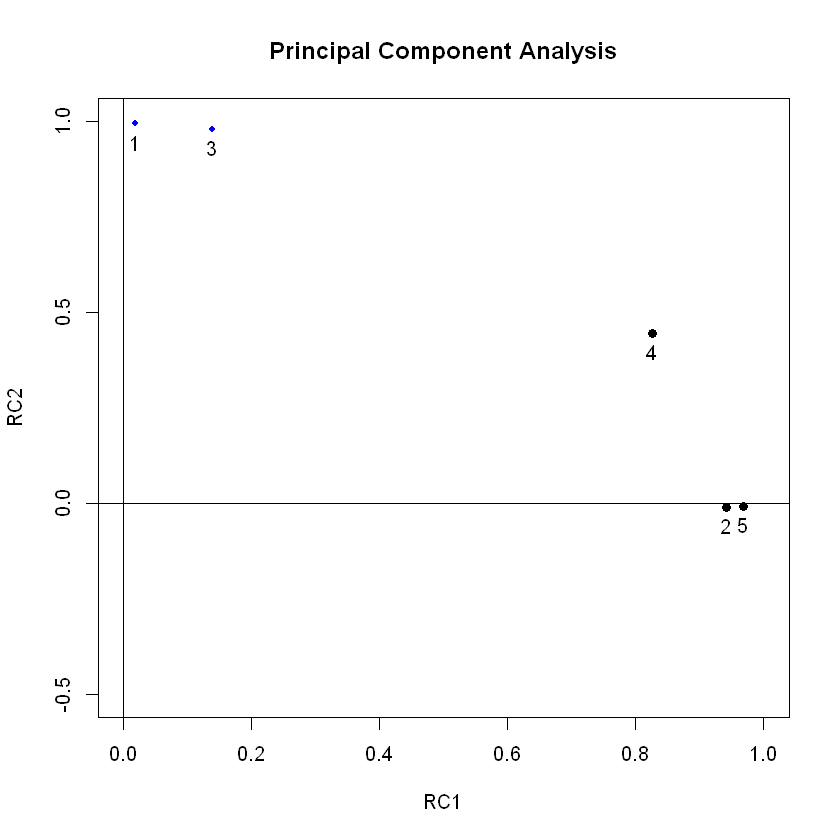

In [19]:
factor.plot(rc, xlim=c(0, 1.0), ylim=c(-0.5, 1.0))  #因子载荷图

通过因子载荷图，我们可以直观地看到，教育和房价变量在第一因子中载荷大，但在第二因子中载荷小；人口和佣人变量则与之相反。在我们此前的相关性分析中，人口和佣人变量之间的相关系数最强，相关系数高达0.97；教育和房价的相关程度次之，相关系数为0.86。因此，这因子载荷也验证了这种相关关系，即人口和佣人、教育和房价两两变量之间信息重叠较为严重，因此我们的因子分析降维过程是较为有效的。

为了实现降维后再对各样品进行比较分析，我们可以计算因子的得分。需要注意的是，因子得分的计算并不是通常意义下的参数估计，而是对不可观测的随机变量的取值作出估计。通常应用两种方法：加权最小二乘法（Bartlett,1937）和回归法（Thompson,1951）。后者虽然是有偏估计，但是它的精度往往更高。

In [20]:
round(rc$weights, 3)  #标准化得分系数

,RC1,RC2
人口,-0.090,0.484
教育,0.392,-0.097
佣人,-0.038,0.465
服务业,0.300,0.137
房价,0.403,-0.098


根据标准化的得分系数，我们有如下表达式：

$$
\begin{gathered}
\hat{f}_{1}^{*}=-0.090 x_{1}^{*}+0.392 x_{2}^{*}-0.038 x_{3}^{*}+0.300 x_{4}^{*}+0.403 x_{5}^{*} \\
\hat{f}_{2}^{*}=0.484 x_{1}^{*}-0.097 x_{2}^{*}+0.465 x_{3}^{*}+0.137 x_{4}^{*}-0.098 x_{5}^{*}
\end{gathered}
$$

In [22]:
scores=round(rc$scores, 3)  #因子得分
head(scores[order(scores[, 1]), ])  #按因子1得分排序
tail(scores[order(scores[, 1]), ])

,RC1,RC2
3,-1.261,-0.765
6,-1.224,0.551
11,-0.945,0.963
2,-0.661,-1.382
12,-0.450,1.109
8,-0.440,0.735


,RC1,RC2
7,-0.171,-1.549
9,0.322,0.913
5,0.936,-0.765
4,1.114,-0.799
1,1.203,-0.033
10,1.578,1.023


In [23]:
head(scores[order(scores[, 2]), ])  #按因子2得分排序
tail(scores[order(scores[, 2]), ])

,RC1,RC2
7,-0.171,-1.549
2,-0.661,-1.382
4,1.114,-0.799
3,-1.261,-0.765
5,0.936,-0.765
1,1.203,-0.033


,RC1,RC2
6,-1.224,0.551
8,-0.440,0.735
9,0.322,0.913
11,-0.945,0.963
10,1.578,1.023
12,-0.450,1.109


可以看到第一个因子得分的取值范围是-1.261~1.578; 第二个因子的得分的取值范围是-1.549~1.109。虽然各因子的得分的最大值和最小值关于零不对称，但是因子得分的平均值都是零。若得分值接近零，则表明该城市在这个因子上的得分接近平均水平。

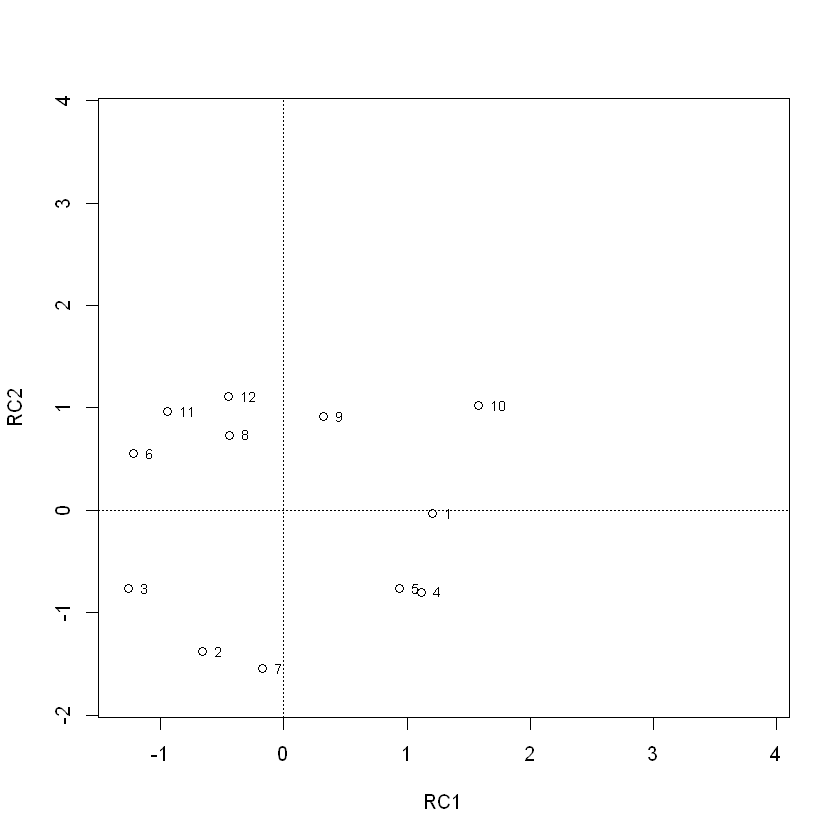

In [24]:
plot(scores[,1], scores[,2], xlab=colnames(scores)[1], ylab=colnames(scores)[2], xlim=c(-1.3, 3.9), ylim=c(-1.8, 3.8))
text(scores[,1], scores[,2], row.names(data), pos=4, cex=0.7)
abline(v=0, h=0, lty=3)

因子分析也能很好地用于对变量的聚类。那么根据散点图，将第一因子得分较大且第二因子得分较小的城市1、4、5、10归为发达城市一类，两个因子得分均较小的城市3、2、7归为荒芜城市一类，第一因子得分较小且第二因子得分较大的城市6、11、8、12、9归为发展中城市一类。

### 四、使用主因子法求解模型



设 $\mathrm{x}$ 的约相关矩阵 $R^{*}$ 为:

$$
R^{*}=R-D=A A^{\prime}
$$

它的对角线元素为 $h_{i}^{2}$, 非对角线元素和 $\mathrm{R}$ 中的完全一致。

设 $\hat{\sigma}_{i}^{2}$ 是特殊方差 $\sigma_{i}^{2}$ 的一个合适的初始估计， 则

$$
\hat{R}^{*}=\hat{R}-\hat{D}
$$

其中, $\hat{R}=\left(r_{i j}\right), \hat{D}=\operatorname{diag}\left(\hat{\sigma}_{1}^{2}, \hat{\sigma}_{2}^{2}, \ldots, \hat{\sigma}_{p}^{2}\right)$.

又设 $\hat{R}^{*}$ 的前 $m$ 个特征值依次为 $\hat{\lambda}_{1}^{*} \geq \hat{\lambda}_{2}^{*} \geq \cdots \geq \hat{\lambda}_{p}^{*} \geq 0$, 相应的正交单位特征向量为 $\hat{t}_{1}{ }^{*}, \hat{t}_{2}{ }^{*}, \cdots, \hat{t}_{p}{ }^{*}$, 则 $\mathrm{A}$ 的主因子解为

$$
\hat{A}=\left(\sqrt{\hat{\lambda}_{1}^{*}} \hat{t}_{1}{ }^{*}, \ldots, \sqrt{\hat{\lambda}_{m}^{*}} \hat{t}_{m}{ }^{*}\right)
$$

重新估计特殊方差：

$$
\hat{\sigma}_{i}^{2}=1-\sum_{j=1}^{m} \hat{a}_{i j}^{2}
$$

采用迭代的方法, 重复上述步骤, 直到解稳定为止。 

***下面的两种方法的演示过程将简略叙述，因为使用的方法和得到的结论几乎是一致的。***

In [32]:
fapa1 = fa(data, nfactors = 1, residuals = TRUE, rotate = "none", fm = "pa", covar = FALSE, SMC = TRUE)  #主因子法因子分析（fm = "pa"），从相关矩阵出发（covar = FALSE，为缺省选项），对每个原始变量取初始共性方差为该变量与其余所有变量的样本复相关系数的平方（SMC = TRUE，为缺省选项）
fapa1$loadings  #因子载荷矩阵，列元素的平方和、因子所解释的总方差的比例及累计比例

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"



Loadings:
       PA1  
人口   0.400
教育   0.717
佣人   0.489
服务业 1.014
房价   0.761

                 PA1
SS loadings    2.519
Proportion Var 0.504

In [33]:
fapa = fa(data, nfactors = 2, residuals = TRUE, rotate = "none", fm = "pa", covar = FALSE, SMC = TRUE)  #主因子法因子分析（fm = "pa"），从相关矩阵出发（covar = FALSE，为缺省选项），对每个原始变量取初始共性方差为该变量与其余所有变量的样本复相关系数的平方（SMC = TRUE，为缺省选项）
fapa$loadings  #因子载荷矩阵，列元素的平方和、因子所解释的总方差的比例及累计比例

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"



Loadings:
       PA1    PA2   
人口    0.624  0.783
教育    0.703 -0.527
佣人    0.704  0.681
服务业  0.881 -0.148
房价    0.775 -0.602

                 PA1   PA2
SS loadings    2.756 1.740
Proportion Var 0.551 0.348
Cumulative Var 0.551 0.899

可以看到，只用一个因子对总方差的贡献度是不够的，使用两个因子比较好。

In [34]:
data.frame(round(fapa$communality, 3))  #共性方差

,round.fapa.communality..3.
,<dbl>
人口,1.003
教育,0.772
佣人,0.959
服务业,0.798
房价,0.964


我们发现两因子的共性方差都较大，表明两个因子能够解释各变量方差的绝大部分。

In [35]:
residual = fapa$residual-diag(diag(fapa$residual))  #残差矩阵
round(residual, 3)

,人口,教育,佣人,服务业,房价
人口,0.000,-0.016,0.000,0.005,0.010
教育,-0.016,0.000,0.019,-0.006,0.000
佣人,0.000,0.019,0.000,-0.005,-0.013
服务业,0.005,-0.006,-0.005,0.000,0.006
房价,0.010,0.000,-0.013,0.006,0.000


残差矩阵的数值已经较小，说明拟合程度较高。

In [37]:
fapa.varimax = fa(data, nfactors = 2, rotate = "varimax", fm = "pa", scores = "regression")  #"regression"是scores的缺省选项，即按回归法计算因子得分
data.frame(round(fapa.varimax$rot.mat, 3))  #旋转矩阵
fapa.varimax$loadings  #旋转后的因子载荷矩阵，列元素的平方和、因子所解释的总方差的比例及累计比例

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"


X1,X2
<dbl>,<dbl>
0.794,0.608
-0.608,0.794



Loadings:
       PA1    PA2   
人口           1.001
教育    0.879       
佣人    0.145  0.968
服务业  0.789  0.419
房价    0.982       

                 PA1   PA2
SS loadings    2.380 2.115
Proportion Var 0.476 0.423
Cumulative Var 0.476 0.899

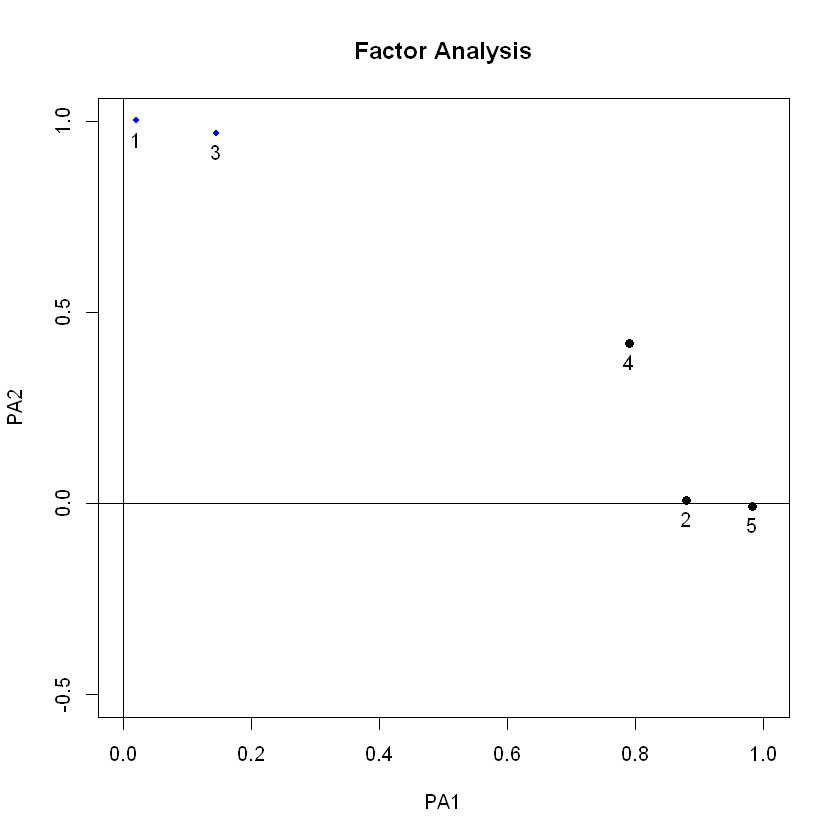

In [42]:
factor.plot(fapa.varimax, xlim = c(0, 1.0), ylim = c(-0.5, 1.0))  #因子载荷图

得到的结论和方法一一样。分别为经济发达因子和人口膨胀因子。

In [43]:
round(fapa.varimax$weights, 3)  #标准化得分系数

,PA1,PA2
人口,-0.665,1.247
教育,-0.033,0.153
佣人,0.641,-0.253
服务业,0.095,0.004
房价,0.872,-0.139


根据标准化的得分系数，我们有如下表达式：

$$
\begin{gathered}
\hat{f}_{1}^{*}=-0.665 x_{1}^{*}-0.033 x_{2}^{*}+0.641 x_{3}^{*}+0.095x_{4}^{*}+0.872 x_{5}^{*} \\
\hat{f}_{2}^{*}=1.247 x_{1}^{*}+0.153 x_{2}^{*}-0.253 x_{3}^{*}+0.004 x_{4}^{*}-0.139 x_{5}^{*}
\end{gathered}
$$

In [44]:
scores = round(fapa.varimax$scores, 3)  #因子得分
head(scores[order(scores[, 1]), ])  #按因子1得分排序
tail(scores[order(scores[, 1]), ])
head(scores[order(scores[, 2]), ])  #按因子2得分排序
tail(scores[order(scores[, 2]), ])

,PA1,PA2
3,-1.279,-0.813
2,-0.923,-1.444
6,-0.919,0.494
11,-0.836,0.971
8,-0.516,0.907
12,-0.315,0.888


,PA1,PA2
7,-0.252,-1.419
9,0.010,1.180
5,1.142,-0.721
4,1.218,-0.746
10,1.283,0.987
1,1.386,-0.284


,PA1,PA2
2,-0.923,-1.444
7,-0.252,-1.419
3,-1.279,-0.813
4,1.218,-0.746
5,1.142,-0.721
1,1.386,-0.284


,PA1,PA2
6,-0.919,0.494
12,-0.315,0.888
8,-0.516,0.907
11,-0.836,0.971
10,1.283,0.987
9,0.010,1.180


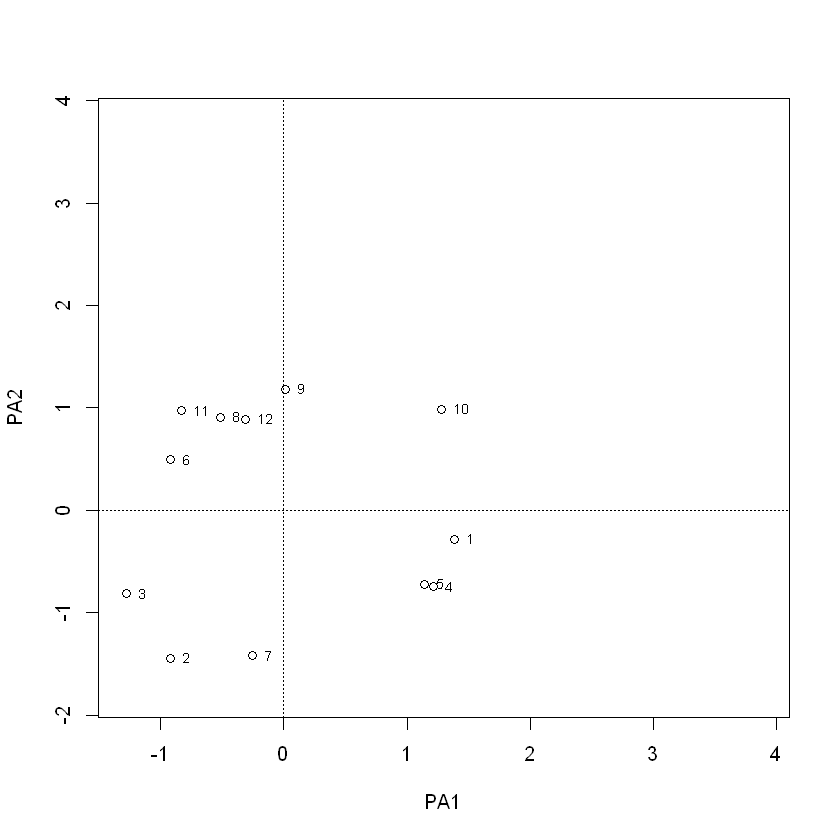

In [45]:
plot(scores[,1], scores[,2], xlab = colnames(scores)[1], ylab = colnames(scores)[2], xlim = c(-1.3, 3.9), ylim = c(-1.8, 3.8))
text(scores[,1], scores[,2], row.names(data), pos = 4, cex = 0.7)
abline(v = 0, h = 0, lty = 3)

分类的结果和主成分法也较为类似。

### 五、使用极大似然法求解模型

设公共因子和特殊因子服从正态分布且相互独立, 则原始变量 $x \sim N_{p}(\mu, \Sigma)$. 又由于 $\Sigma=\mathrm{AA}^{\prime}+D$, 故似然函数可以表示为$\operatorname{L}(\mu ,A,\operatorname{D})$，且有$\operatorname{L}(\hat{\mu} ,\hat{A},\operatorname{\hat{D}})=max \operatorname{L}(\mu ,A,\operatorname{D})$.可以证明，$\hat{A}$和$\hat{D}$满足以下方程，并且通常$A^{\prime}D^{-1}A$是对角矩阵：

$$
\left\{\begin{array}{l}
\hat{\Sigma} \hat{D}^{-1} \hat{A}=\hat{A}\left(I_{m}+\hat{A}^{\prime} \hat{D}^{-1} \hat{A}\right) \\
\hat{D}=\operatorname{diag}\left(\hat{\Sigma}-\hat{A} \hat{A}^{\prime}\right)
\end{array}\right.
$$

需要注意的是, 对极大似然解, 各因子所解释的总方差的比例末必像主成分解及主因子解那样依次递减；当因子数增加时， 原来因子的估计载荷及对 $\mathrm{x}$ 的贡献将发生变化。

In [47]:
faml1 = fa(data, nfactors = 1, residuals = TRUE, rotate = "none", fm = "ml")  #极大似然法因子分析（fm = "ml"），选取2个因子，残差矩阵，未旋转
faml1$loadings  #因子载荷矩阵，列元素的平方和、因子所解释的总方差的比例及累计比例


Loadings:
       ML1  
人口   0.975
教育   0.145
佣人   0.998
服务业 0.511
房价   0.116

                 ML1
SS loadings    2.240
Proportion Var 0.448

In [48]:
faml = fa(data, nfactors = 2, residuals = TRUE, rotate = "none", fm = "ml")  #极大似然法因子分析（fm = "ml"），选取2个因子，残差矩阵，未旋转
faml$loadings  #因子载荷矩阵，列元素的平方和、因子所解释的总方差的比例及累计比例


Loadings:
       ML2    ML1   
人口           0.997
教育    0.897       
佣人           0.978
服务业  0.777  0.460
房价    0.961       

                 ML2   ML1
SS loadings    2.342 2.165
Proportion Var 0.468 0.433
Cumulative Var 0.468 0.901

根据Cumulative Var的结果，应当选择m=2时的情况。

In [49]:
data.frame(round(faml$communality, 3))  #共性方差

,round.faml.communality..3.
,<dbl>
人口,0.995
教育,0.807
佣人,0.964
服务业,0.815
房价,0.926


共性方差均较大，表明两个因子能够解释各变量方差的绝大部分。

In [50]:
residual = faml$residual-diag(diag(faml$residual))  #残差矩阵
round(residual, 3)

,人口,教育,佣人,服务业,房价
人口,0.000,-0.005,0.000,0.001,0.001
教育,-0.005,0.000,0.036,-0.023,-0.001
佣人,0.000,0.036,0.000,-0.005,-0.011
服务业,0.001,-0.023,-0.005,0.000,0.010
房价,0.001,-0.001,-0.011,0.010,0.000


残差矩阵数值较小，说明拟合效果很好。

In [51]:
faml.varimax = fa(data, nfactors = 2, rotate = "varimax", fm = "ml", scores = "regression")  #极大似然法因子分析，选取2个因子，使用最大方差旋转法，计算因子得分（缺省时为回归法）
data.frame(round(faml.varimax$rot.mat, 3))
faml.varimax$loadings  #旋转后的因子载荷矩阵，列元素的平方和、因子所解释的总方差的比例及累计比例

X1,X2
<dbl>,<dbl>
0.999,0.047
-0.047,0.999



Loadings:
       ML2    ML1   
人口           0.997
教育    0.898       
佣人    0.137  0.972
服务业  0.798  0.423
房价    0.962       

                 ML2   ML1
SS loadings    2.388 2.118
Proportion Var 0.478 0.424
Cumulative Var 0.478 0.901

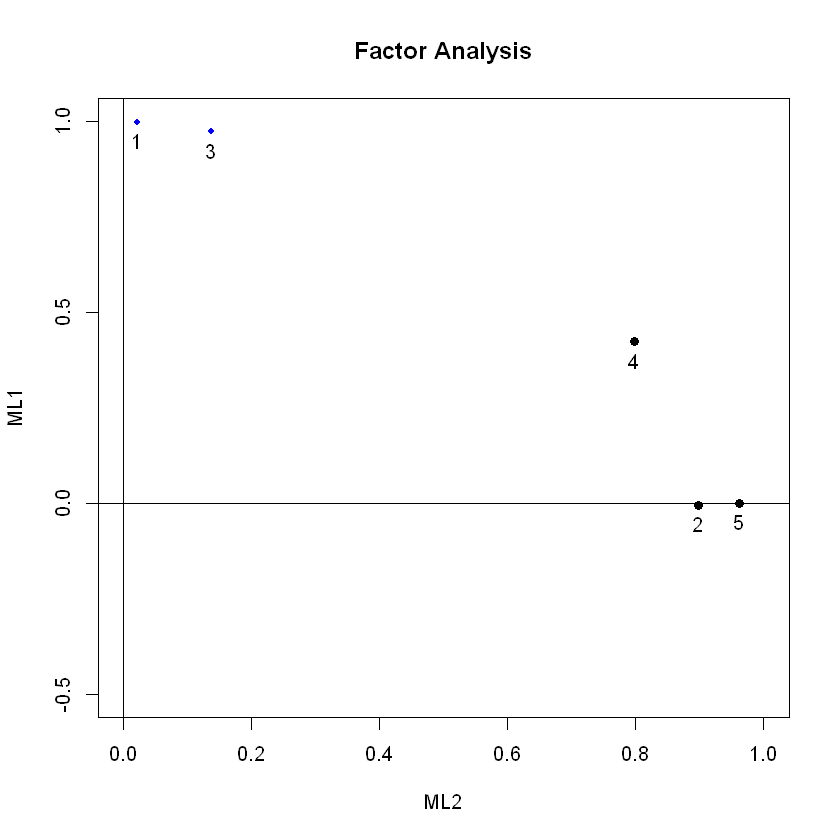

In [53]:
factor.plot(faml.varimax, xlim = c(0, 1.0), ylim = c(-0.5, 1.0))  #因子载荷图

得到的结论前面的是相同的。

In [54]:
round(faml.varimax$weights, 3)  #标准化得分系数

,ML2,ML1
人口,-0.202,0.887
教育,0.218,-0.009
佣人,0.124,0.113
服务业,0.197,0.002
房价,0.610,-0.026


根据标准化的得分系数，我们有如下表达式：

$$
\begin{gathered}
\hat{f}_{1}^{*}=-0.202x_{1}^{*}+0.218 x_{2}^{*}+0.124 x_{3}^{*}+0.197x_{4}^{*}+0.610 x_{5}^{*} \\
\hat{f}_{2}^{*}=0.887x_{1}^{*}-0.009 x_{2}^{*}+0.113 x_{3}^{*}+0.002 x_{4}^{*}-0.026 x_{5}^{*}
\end{gathered}
$$

In [55]:
scores = round(faml.varimax$scores, 3)  #因子得分
head(scores[order(scores[, 1]), ])  #按因子1得分排序
head(scores[order(scores[, 2]), ])  #按因子2得分排序

,ML2,ML1
3,-1.245,-0.810
6,-1.055,0.565
11,-0.875,0.984
2,-0.792,-1.480
8,-0.456,0.836
12,-0.443,0.983


,ML2,ML1
2,-0.792,-1.480
7,-0.188,-1.474
3,-1.245,-0.810
4,1.143,-0.731
5,1.024,-0.684
1,1.237,-0.162


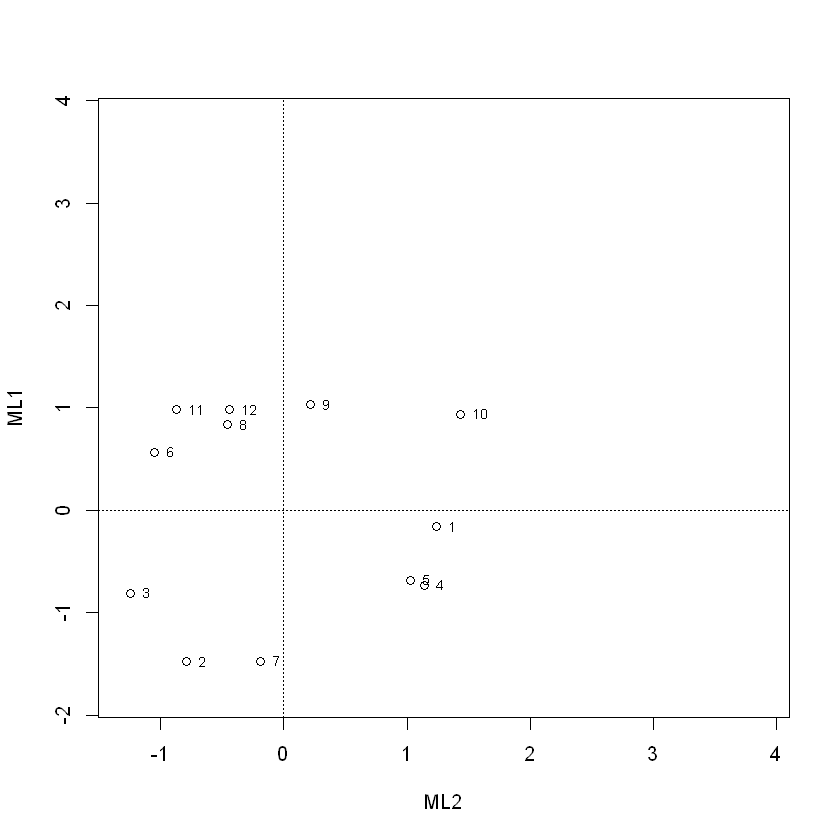

In [56]:
plot(scores[,1], scores[,2], xlab = colnames(scores)[1], ylab = colnames(scores)[2], xlim = c(-1.3, 3.9), ylim = c(-1.8, 3.8))
text(scores[,1], scores[,2], row.names(data), pos = 4, cex = 0.7)
abline(v = 0, h = 0, lty = 3)

得到的结论与前面的两种方法一致。